# **Day - 33 : Website Data Analysis**

*1.*

*Using pandas, import the website_data_analysis.cvs dataset and find the average number of visits per website.* 

In [1]:
import pandas as pd

df = pd.read_csv("Data/website_data_analysis.csv")
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue
0,boss.com,5000,20,3.0,Monday,3000,Google,1000
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000


In [2]:
df_average_visit_per_site = df.groupby('website')['visits'].mean()
df_average_visit_per_site.head()

website
Childcare.net       1400.0
CodeCrushers.org    2900.0
CraftyCorner.com    3000.0
FinFit.net          3400.0
FoodieFrenzy.com    3200.0
Name: visits, dtype: float64

*2.*

*Add another column to the DataFrame that calculates the average number of website views per unique visitor.* 

In [3]:
df["views_per_unique_visit"] = df["visits"] / df["unique_visitors"]
df.head()

,website,visits,bounce_rate,conversion_rate,days_of_week,unique_visitors,referral_source,revenue,views_per_unique_visit
0,boss.com,5000,20,3.0,Monday,3000,Google,1000,1.666667
1,python.com,3500,25,2.0,Tuesday,2800,Facebook,800,1.250000
2,wild.com,6000,15,4.0,Wednesday,3900,Twitter,1200,1.538462
3,cat.com,4500,30,1.5,Thursday,3500,Instagram,700,1.285714
4,kit.com,5500,18,3.5,Friday,3700,Yahoo,1000,1.486486


*3.*

*Using Matplotlib, create a bar graph to visualize the top 5 websites with the highest number of page views.* 

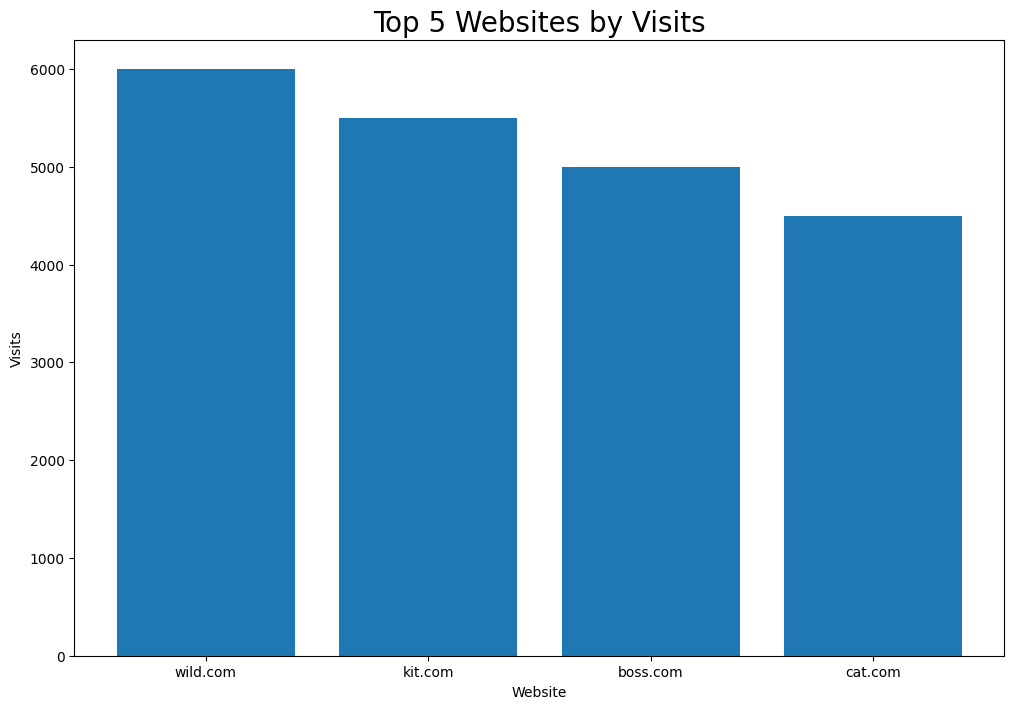

In [4]:
import matplotlib.pyplot as plt

top_5_websites = df.sort_values(by="visits", ascending=False).head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_5_websites["website"], top_5_websites["visits"])
plt.xlabel("Website")
plt.ylabel("Visits")
plt.title("Top 5 Websites by Visits", fontsize=20)
plt.show()

*4.*

*Using pandas, group the data by the day of the week and find the average bounce rate for each day.* 

In [5]:
average_bounce_rate_by_day = df.groupby("days_of_week")["bounce_rate"].mean()
average_bounce_rate_by_day

days_of_week
Friday       15.666667
Monday       21.333333
Saturday     16.000000
Sunday       18.333333
Thursday     20.666667
Tuesday      18.000000
Wednesday    13.666667
Name: bounce_rate, dtype: float64

*5.*

*Using seaborn, create a line plot to show the trend of unique visitors over time.* 

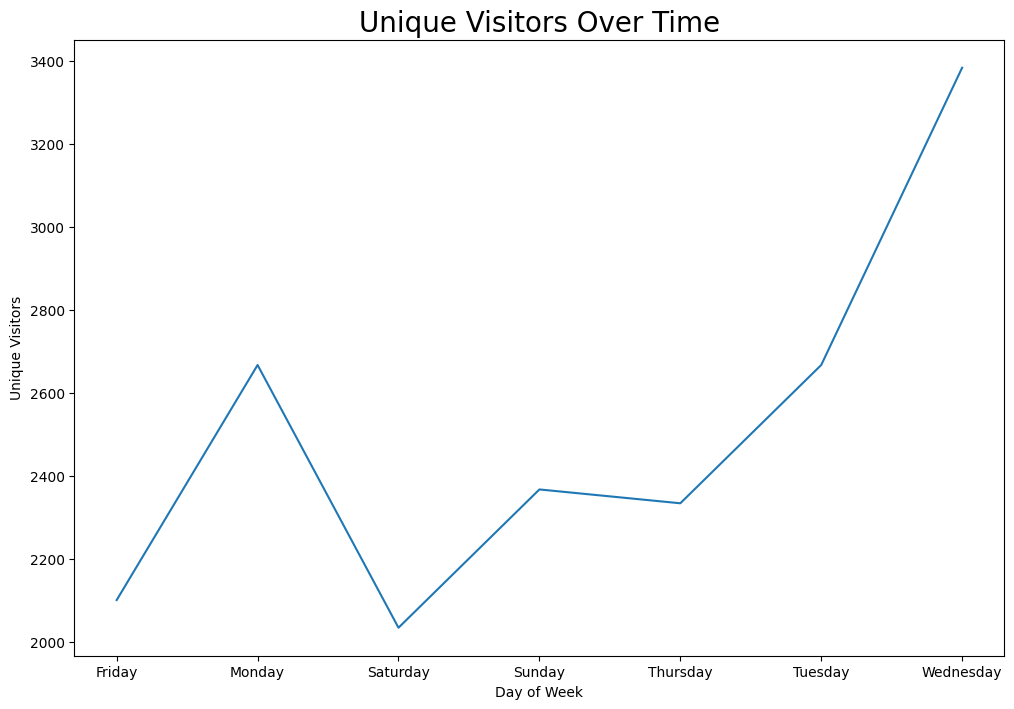

In [9]:
import seaborn as sns
df_group = df.groupby('days_of_week')['unique_visitors'].mean()

plt.figure(figsize = (12, 8))
sns.lineplot(x=df_group.index, y=df_group)

plt.xlabel("Day of Week")
plt.ylabel("Unique Visitors")
plt.title("Unique Visitors Over Time", fontsize = 20)
plt.show()

*6.*

*Using pandas, group the data by "day_of_week" and "referral_source" columns and find the average number of visits and revenue for each group.* 

In [7]:
grouped_df = df.groupby(['days_of_week','referral_source'])[['visits','revenue']].mean()
grouped_df.head()

visits  revenue
days_of_week referral_source                 
Friday       Instagram        2100.0   1450.0
             Yahoo            5500.0   1000.0
Monday       Google           5000.0   1000.0
             Instagram        2600.0    700.0
             Reddit           3200.0    900.0

*7.*

*Using pandas, calculate the revenue rate for each referral source and create a pie chart to visualize the breakdown of revenue rate by referral source. Which referral source brought it the most revenue?* 

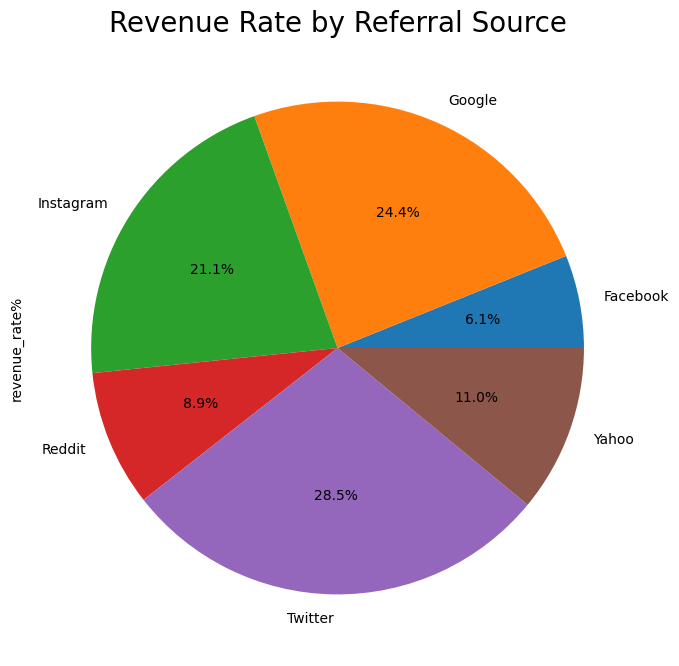

In [8]:
df["revenue_rate%"]= (df["revenue"]/(sum(df["revenue"])))*100

group_data = df.groupby("referral_source")["revenue_rate%"].sum()

plt.figure(figsize=(12, 8))
group_data.plot.pie(autopct='%.1f%%')
plt.title("Revenue Rate by Referral Source", fontsize = 20)
plt.show()